# 아보카도 물가 예측 

In [1]:
import numpy as np
import pandas as pd
from prophet import Prophet

c:\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [2]:
df = pd.read_csv('avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [4]:
df.groupby('type').mean()

C:\Users\tiamo\AppData\Local\Temp\ipykernel_9956\4010974869.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('type').mean()


,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
type,,,,,,,,,,,
conventional,24.236686,1.158040,1.653213e+06,578611.649925,574805.318859,45405.796798,454390.130901,346721.795885,101457.698855,6210.635065,2016.147929
organic,24.227776,1.653999,4.781121e+04,7311.281600,15411.857724,266.254582,24817.654696,17613.474543,7202.982659,1.197164,2016.147868


In [6]:
df = df.loc[(df.type == 'conventional') & (df.region == 'TotalUS')] # 두가지만 사용한다.

df['Date'] = pd.to_datetime(df['Date']) # 날 스트링에서 데이트 타입으로 

data = df[['Date', 'AveragePrice']].reset_index(drop=True) # 두개만 살리고 다 지운다 

data = data.rename(columns={'Date': 'ds', 'AveragePrice':'y'}) # 칼럼 이름을 변경 해준다.

data.head()

,ds,y
0,2015-12-27,0.95
1,2015-12-20,0.98
2,2015-12-13,0.93
3,2015-12-06,0.89
4,2015-11-29,0.99


<Axes: xlabel='ds'>

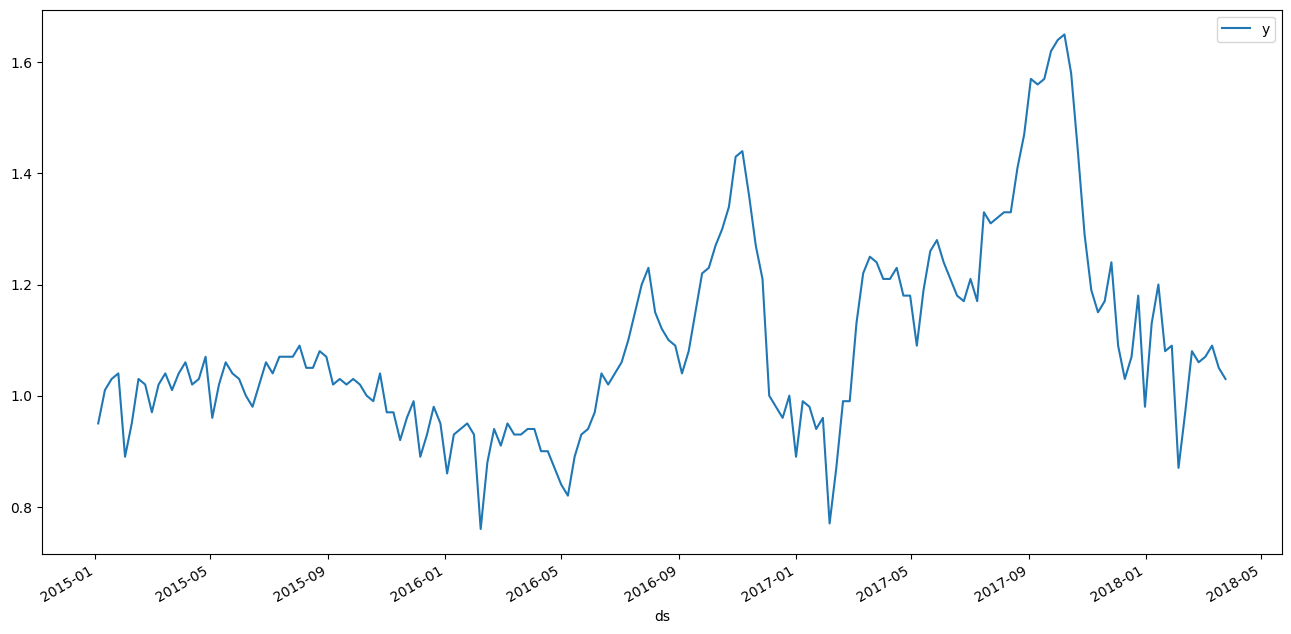

In [7]:
data.plot(x='ds', y='y', figsize=(16,8))

### fit

In [8]:
model = Prophet()

model.fit(data) # 학습한다. 


18:54:38 - cmdstanpy - INFO - Chain [1] start processing
18:54:38 - cmdstanpy - INFO - Chain [1] done processing


### Predict

In [9]:
future = model.make_future_dataframe(periods=365) # 호출하고 기간은 365 

forecast = model.predict(future) # 예측

forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
529,2019-03-21,1.167478,0.978354,1.232625,1.096577,1.230955,-0.060110,-0.060110,-0.060110,-0.060110,-0.060110,-0.060110,0.0,0.0,0.0,1.107368
530,2019-03-22,1.167358,0.984440,1.235250,1.096122,1.231250,-0.058715,-0.058715,-0.058715,-0.058715,-0.058715,-0.058715,0.0,0.0,0.0,1.108643
531,2019-03-23,1.167237,0.978624,1.235877,1.095667,1.231542,-0.056847,-0.056847,-0.056847,-0.056847,-0.056847,-0.056847,0.0,0.0,0.0,1.110390
532,2019-03-24,1.167117,0.968195,1.234033,1.095212,1.231806,-0.054521,-0.054521,-0.054521,-0.054521,-0.054521,-0.054521,0.0,0.0,0.0,1.112595
533,2019-03-25,1.166996,0.984141,1.241575,1.094715,1.231838,-0.051769,-0.051769,-0.051769,-0.051769,-0.051769,-0.051769,0.0,0.0,0.0,1.115227


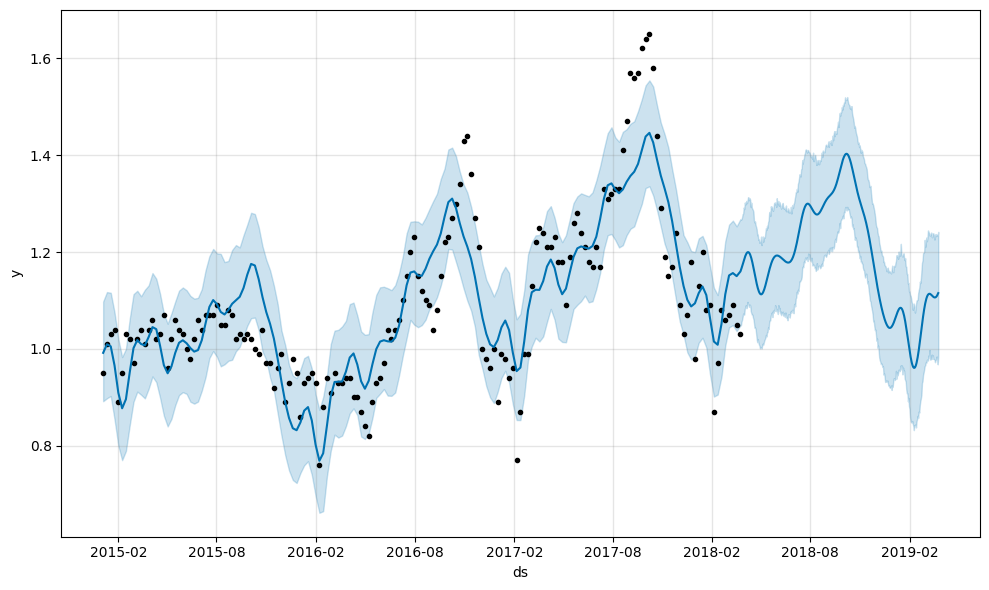

In [10]:
fig1 = model.plot(forecast)

# 검은점 가격
# 색칠 트렌트  

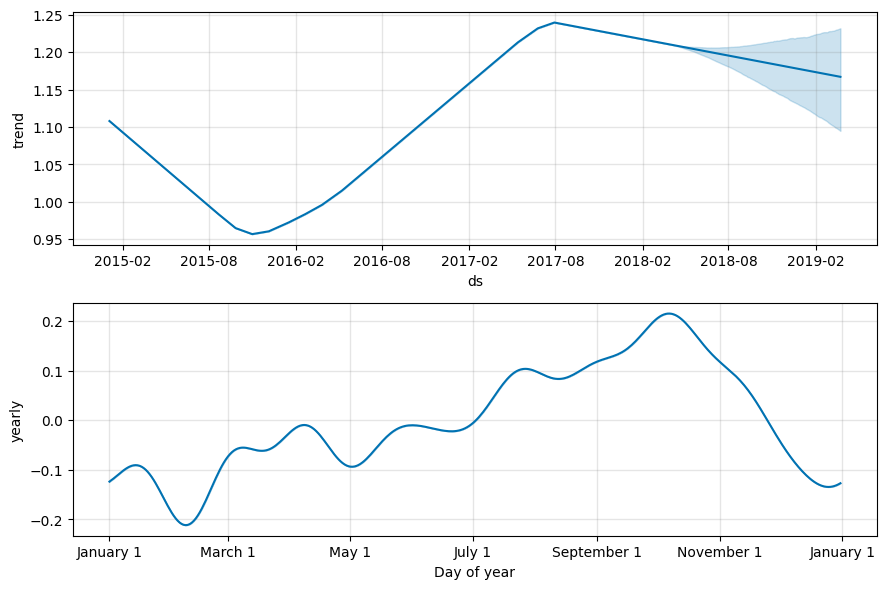

In [11]:
fig2 = model.plot_components(forecast) # 어떤 근거로 예측을 했는지